In [2]:
import os
import pathlib
import imageio
import numpy as np

# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Analyze the training image masks

In [5]:
# Glob the training data and load a single image path
training_paths = pathlib.Path('stage1/official/stage1_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
image_to_segmentation = {}
for p in training_sorted:
    image_key = str(p).split('/')[-1].strip('.png')
    seg_paths = pathlib.Path('stage1/official/stage1_train/' + image_key).glob('masks/*.png')
    seg_sorted = sorted([x for x in seg_paths])
    image_to_segmentation[image_key] = []
    for p_seg in seg_sorted:
        image_to_segmentation[image_key].append(str(p_seg).split('/')[-1].strip('.png'))

print('the total number of training image is: ', len(image_to_segmentation))

the total number of training image is:  670


In [6]:
def get_image_path(image_key):
    return os.path.join('stage1/official/stage1_train', image_key, 'images', image_key + '.png')
def get_seg_path(image_key, seg_key):
    return os.path.join('stage1/official/stage1_train', image_key, 'masks', seg_key + '.png')

### statistics of number of segmentation instances

large num of segs:  07fb37aafa6626608af90c1e18f6a743f29b6b233d2e427dcd1102df6a916cf5
large num of segs:  0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1
large num of segs:  20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f
small num of segs:  220b37f4ca7cab486d2b71cd87a46ee7411a5aa142799d96ed98015ab5ba538a
small num of segs:  3d0ca3498d97edebd28dbc7035eced40baa4af199af09cbb7251792accaa69fe
large num of segs:  547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3cfa6576f24c631a7ae6
small num of segs:  58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921
large num of segs:  5afb7932e9c7328f4fb1d7a8166a3699d6cdc5192b93758a75e9956f1513c5a3
large num of segs:  6fe2df6de1d962b90146c822bcefc84d0d3d6926fdfbacd3acdc9de830ee5622
small num of segs:  7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80
small num of segs:  84eeec681987753029eb83ea5f3ff7e8b5697783cdb2035f2882d40c9a3f1029
large num of segs:  8efed2e62c919e6d70a2ab548b1a33014877fe8a23f17

(array([ 168.,  205.,   91.,   62.,   40.,   26.,   15.,   13.,   15.,
          11.,    5.,    3.,    2.,    5.,    0.,    0.,    2.,    2.,
           1.,    1.,    1.,    0.,    0.,    0.,    2.]),
 array([   1.  ,   15.96,   30.92,   45.88,   60.84,   75.8 ,   90.76,
         105.72,  120.68,  135.64,  150.6 ,  165.56,  180.52,  195.48,
         210.44,  225.4 ,  240.36,  255.32,  270.28,  285.24,  300.2 ,
         315.16,  330.12,  345.08,  360.04,  375.  ]),
 <a list of 25 Patch objects>)

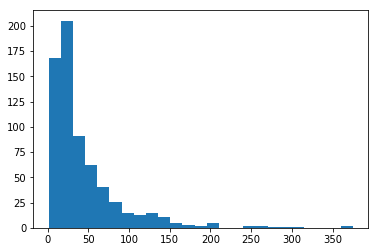

In [32]:
seg_nums = []
for k, v in image_to_segmentation.items():
    seg_nums.append(len(v))
    if len(v) > 200:
        print('large num of segs: ', k)
    if len(v) < 5:
        print('small num of segs: ', k)
print('max number of segs: ', max(seg_nums))
print('min number of segs: ', min(seg_nums))
print('mean number of segs: ', np.mean(seg_nums))
print('median number of segs: ', np.median(seg_nums))
plt.hist(seg_nums, bins=25)

### image and segmentation format and size analysis

In [49]:
height = []
width = []
area = []
aspect_ratio = []
for image_key, seg_key_list in image_to_segmentation.items():
    image_path = get_image_path(image_key)
    im = imageio.imread(image_path)
    assert im.ndim == 3
    h, w, c = im.shape
    assert c == 4
    height.append(h)
    width.append(w)
    aspect_ratio.append(w / h)
    area.append(h * w)
    if h == 1040 or h == 1024:
        print('large height: ', h, image_key)
    if w == 1024 or w == 1272:
        print('large width: ', w, image_key)
    if w == 1388:
        print('max width: ', w, image_key)
    if w / h > 2:
        print('large aspect ratio: ', w/h, image_key)
    
    for seg_key in seg_key_list:
        seg_path = get_seg_path(image_key, seg_key)
        seg = imageio.imread(seg_path)
        assert seg.ndim == 2
        h_seg, w_seg = seg.shape
        assert h == h_seg
        assert w == w_seg

large height:  1024 08275a5b1c2dfcd739e8c4888a5ee2d29f83eccfa75185404ced1dc0866ea992
large width:  1024 08275a5b1c2dfcd739e8c4888a5ee2d29f83eccfa75185404ced1dc0866ea992
large height:  1024 091944f1d2611c916b98c020bd066667e33f4639159b2a92407fe5a40788856d
large width:  1024 091944f1d2611c916b98c020bd066667e33f4639159b2a92407fe5a40788856d
large height:  1024 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e
large width:  1024 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e
large height:  1024 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df
large width:  1024 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df
large width:  1272 20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f
large aspect ratio:  2.109452736318408 20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f
large height:  1024 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812
large width:  1024 2a1a294e21d76efd0399e4eb321b45f4

height val:  [ 256  260  360  512  520  603 1024 1040]
width val:  [ 256  320  347  360  640  696 1024 1272 1388]
area val:  [  65536   81920   90220  129600  327680  361920  767016 1048576 1443520]
aspect_ratio val:  [ 1.          1.25        1.33461538  1.33846154  2.10945274]


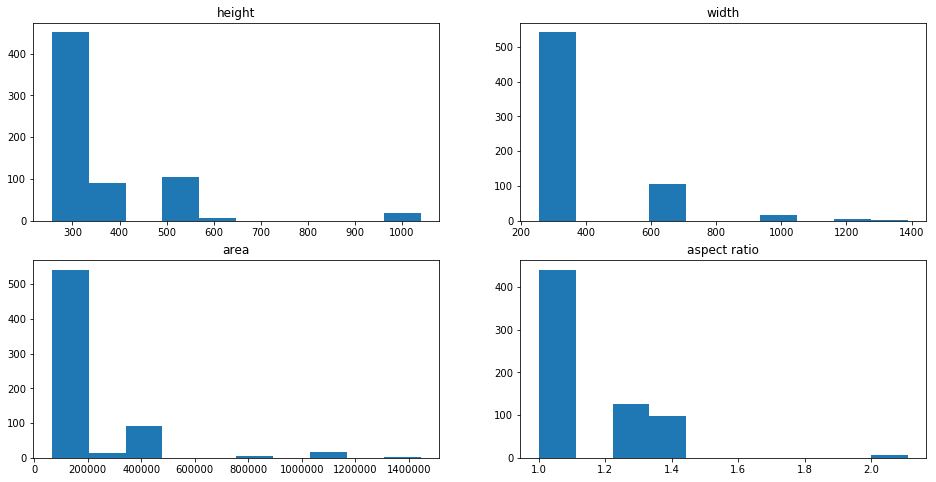

In [40]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.hist(height)
plt.title('height')
print('height val: ', np.unique(height))
plt.subplot(2, 2, 2)
plt.hist(width)
plt.title('width')
print('width val: ', np.unique(width))
plt.subplot(2, 2, 3)
plt.hist(area)
plt.title('area')
print('area val: ', np.unique(area))
plt.subplot(2, 2, 4)
plt.hist(aspect_ratio)
plt.title('aspect ratio')
print('aspect_ratio val: ', np.unique(aspect_ratio))

### image and segmentation pixel intensities analysis

In [121]:
img_intensity_R = []
img_intensity_G = []
img_intensity_B = []
image_keys = []
for image_key, seg_key_list in image_to_segmentation.items():
    image_path = get_image_path(image_key)
    im = imageio.imread(image_path)
    image_keys.append(image_key)
    img_intensity_R.append(im[:, :, 0].mean())
    img_intensity_G.append(im[:, :, 1].mean())
    img_intensity_B.append(im[:, :, 2].mean())
    assert len(np.unique(im[:, :, 3])) == 1
    assert np.unique(im[:, :, 3])[0] == 255
    for seg_key in seg_key_list:
        seg_path = get_seg_path(image_key, seg_key)
        seg = imageio.imread(seg_path)
        assert np.all(np.unique(seg)  == [0, 255])

670
670
670


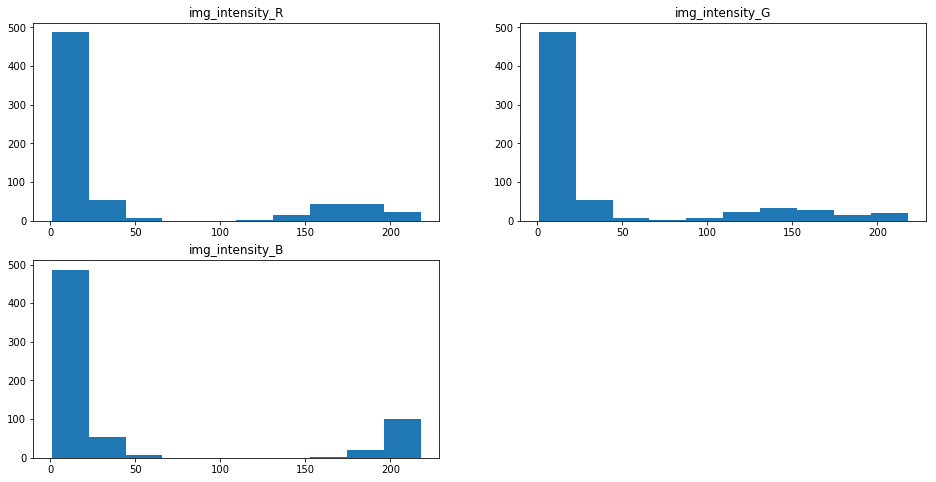

In [58]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.hist(img_intensity_R)
plt.title('img_intensity_R')
print(len(np.unique(img_intensity_R)))
plt.subplot(2, 2, 2)
plt.hist(img_intensity_G)
plt.title('img_intensity_G')
print(len(np.unique(img_intensity_G)))
plt.subplot(2, 2, 3)
plt.hist(img_intensity_B)
plt.title('img_intensity_B')
print(len(np.unique(img_intensity_B)))

<IPython.core.display.Javascript object>


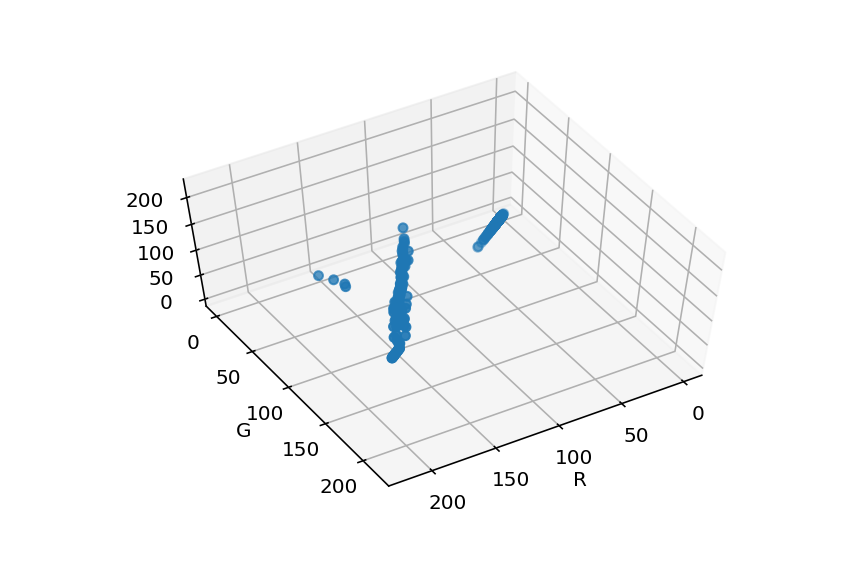

In [118]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(90, 0)
ax.scatter3D(img_intensity_R, img_intensity_G, img_intensity_B)
plt.xlabel('R')
plt.ylabel('G')

### using K-Means to do a classification according to color intensity

In [112]:
RGB_intensities = np.array([img_intensity_R, img_intensity_G, img_intensity_B]).T

<IPython.core.display.Javascript object>


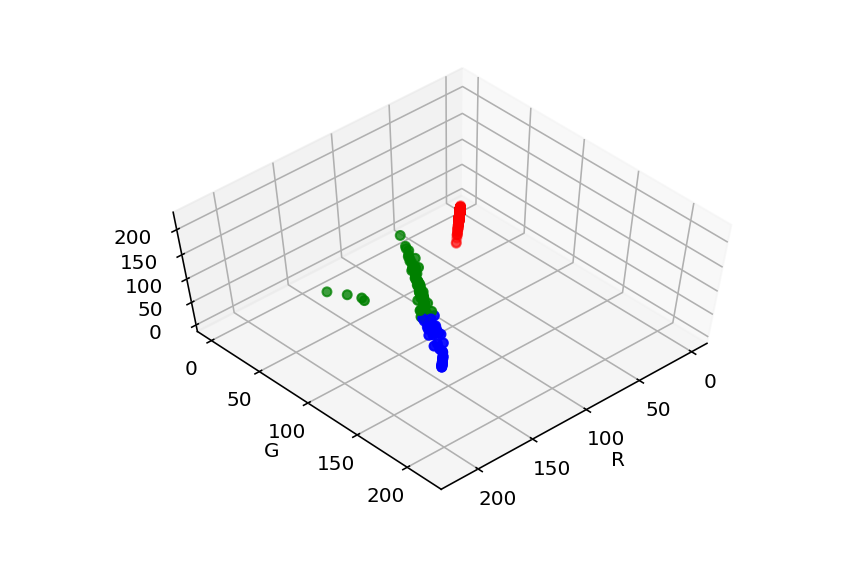

In [120]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=1000, tol=1e-6)
prediction = kmeans.fit_predict(RGB_intensities)
colors = [['r', 'g', 'b'][i] for i in prediction]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(90, 0)
ax.scatter3D(img_intensity_R, img_intensity_G, img_intensity_B, c=colors)
plt.xlabel('R')
plt.ylabel('G')

### The K-Means algorithm doesn't perform well, after some searching, we found the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm might work well
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68 (2018-3-17)
It seems there are basically three classes of the color intensity, they may be under different experimental condition.

<IPython.core.display.Javascript object>


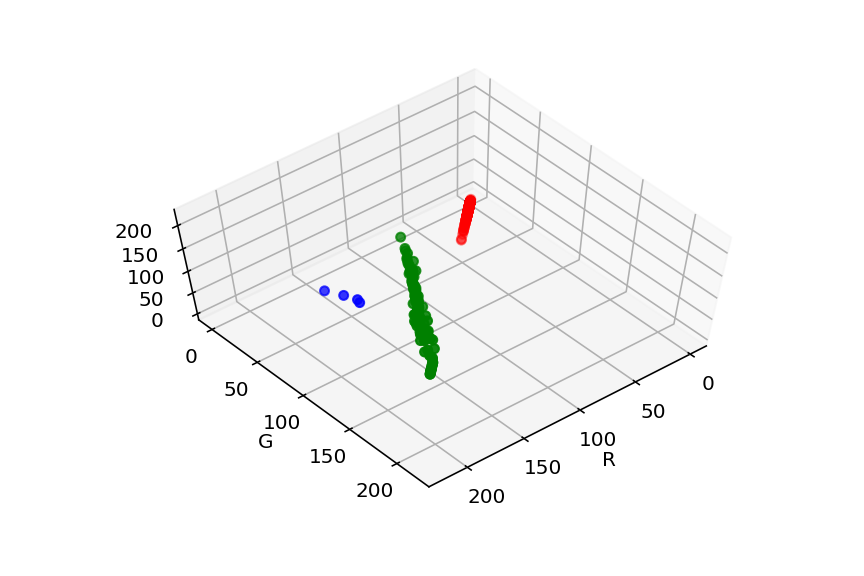

In [126]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=20)  # after try some eps, the algorithm perform well.
prediction = model.fit_predict(RGB_intensities)
colors = [['r', 'g', 'b'][i] for i in prediction]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(90, 0)
ax.scatter3D(img_intensity_R, img_intensity_G, img_intensity_B, c=colors)
plt.xlabel('R')
plt.ylabel('G')

In [132]:
prediction = np.array(prediction)
prediction[prediction == -1] = 2
with open('train_condition1.txt', 'a') as f1, open('train_condition2.txt', 'a') as f2, open('train_condition3.txt', 'a') as f3:
    for i, cls in enumerate(prediction):
        if cls == 0:
            print(image_keys[i], file=f1)
        elif cls == 1:
            print(image_keys[i], file=f2)
        elif cls == 2:
            print(image_keys[i], file=f3)
        else: 
            print('unclassified color intensity, cls=', cls)
            print(image_keys[i])
            

### analyze training segmentation instance
First analyze the segmentation instance sizes

In [9]:
seg_sizes_mean = []
seg_sizes_median = []
seg_sizes_tot = []
seg_sizes = []
for image_key, seg_key_list in image_to_segmentation.items():
    seg_sizes_img = []
    for seg_key in seg_key_list:
        seg_path = get_seg_path(image_key, seg_key)
        seg = imageio.imread(seg_path)
        seg = seg > 0
        size = seg.sum()
        if size > 5000:
            print('img key: ', image_key)
            print('seg key: ', seg_key)
            print('size: ', size)
        seg_sizes_img.append(size)
        seg_sizes_tot.append(size)
        seg_sizes_mean.append(np.mean(seg_sizes_img))
        seg_sizes_median.append(np.median(seg_sizes_img))
        seg_sizes.append(seg_sizes_img)

<IPython.core.display.Javascript object>


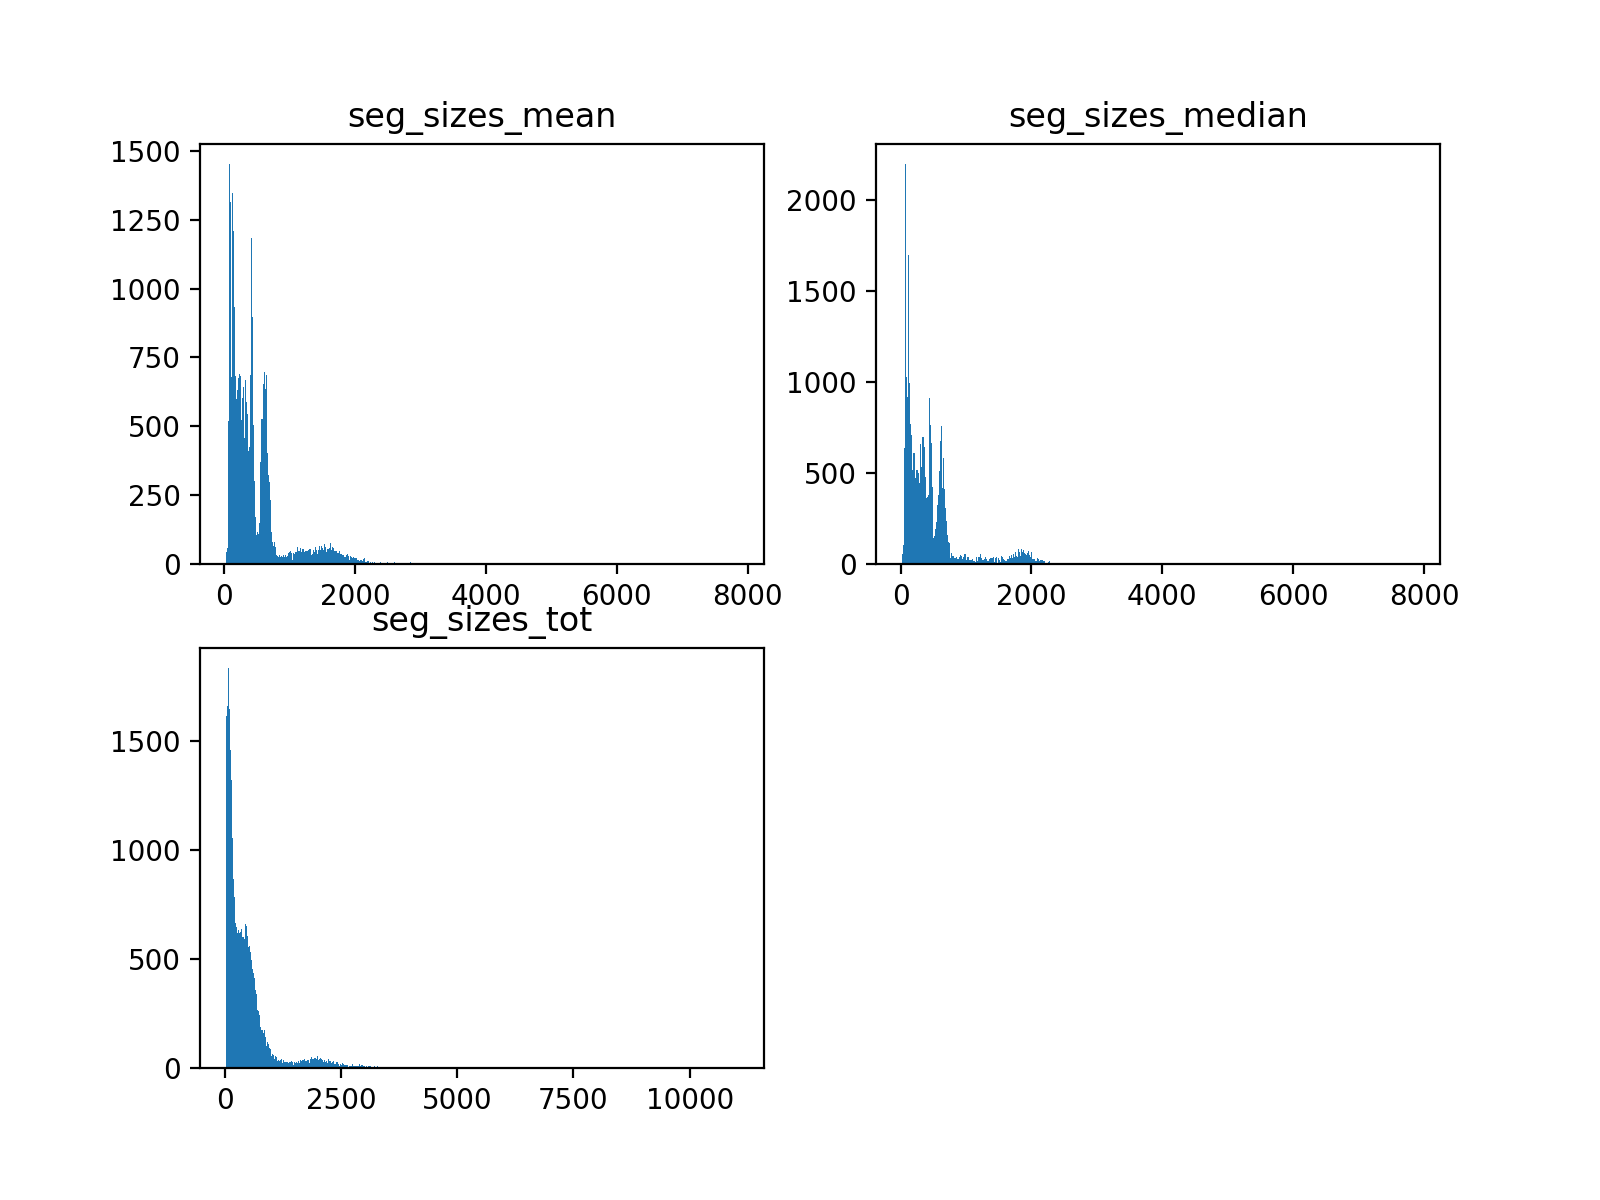

max mean:  7852.5 min mean 21.0
max median:  7852.5 min median 21.0
max size:  11037 min size 21


In [13]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.hist(seg_sizes_mean, bins=500)
plt.title('seg_sizes_mean')
print('max mean: ', np.max(seg_sizes_mean), 'min mean', np.min(seg_sizes_mean))
plt.subplot(2, 2, 2)
plt.hist(seg_sizes_median, bins=500)
plt.title('seg_sizes_median')
print('max median: ', np.max(seg_sizes_median), 'min median', np.min(seg_sizes_median))
plt.subplot(2, 2, 3)
plt.hist(seg_sizes_tot, bins=500)
plt.title('seg_sizes_tot')
print('max size: ', np.max(seg_sizes_tot), 'min size', np.min(seg_sizes_tot))

### analyze if there are segmentations overlap

In [7]:
for image_key, seg_key_list in image_to_segmentation.items():
    image_path = get_image_path(image_key)
    im = imageio.imread(image_path)
    seg = np.full(im.shape[:2], False)
    for seg_key in seg_key_list:
        seg_path = get_seg_path(image_key, seg_key)
        seg_ins = imageio.imread(seg_path)
        seg_ins = seg_ins > 0
        overlap = (seg & seg_ins).sum()
        if overlap > 0:
            print('overlap: ', image_key)
        seg |= seg_ins
        flattenmasks_path = os.path.join('stage1/single_masks', image_key + '.png')
        imageio.imsave(flattenmasks_path, seg * 255)

/Users/li/anaconda/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from int64 to uint8, range [0, 255]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


In [33]:
# check image
for image_key, seg_key_list in image_to_segmentation.items():
    print(image_key)
    flattenmasks_path = os.path.join('stage1_train_flattenmasks', image_key + '_seg.png')
    im = imageio.imread(flattenmasks_path)
    print(im.shape)
    unq = np.unique(im)
    print(unq)
    assert len(unq) == 2
    assert np.all(unq == [0, 255])

00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552
(256, 256)
[  0 255]
003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1
(256, 256)
[  0 255]
00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e
(256, 320)
[  0 255]
0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed
(256, 320)
[  0 255]
01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf
(256, 320)
[  0 255]
0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21
(256, 256)
[  0 255]
0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426
(256, 256)
[  0 255]
02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339
(360, 360)
[  0 255]
03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776
(256, 256)
[  0 255]
03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe
(360, 360)
[  0 255]
03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a
(360, 360)
[  0 255]
0402a81e75262469925ea893b6706183832e85324f7b1e08e63412

(256, 256)
[  0 255]
2e2d29fc44444a85049b162eb359a523dec108ccd5bd75022b25547491abf0c7
(256, 320)
[  0 255]
2f929b067a59f88530b6bfa6f6889bc3a38adf88d594895973d1c8b2549fd93d
(256, 256)
[  0 255]
30311520606ec99b6a810ae1a9a753df991777d374212423bb075c408a98ed74
(256, 256)
[  0 255]
305a8baaf726d7c9e695bff31d3a6a61445999a4732f0a3e6174dc9dcbe43931
(256, 256)
[  0 255]
308084bdd358e0bd3dc7f2b409d6f34cc119bce30216f44667fc2be43ff31722
(256, 256)
[  0 255]
309ba76b12ecb5ce28b99f3445b2b5dc54c0564c3c0e24c17e4c89a94a5d0535
(256, 256)
[  0 255]
30f65741053db713b3f328d31d3234b6fedbe31df65c1a8ea29be28146cab789
(256, 256)
[  0 255]
317832f90f02c5e916b2ac0f3bcb8da9928d8e400b747b2c68e544e56adacf6b
(256, 256)
[  0 255]
319b6cb8b0d24b38db5e3c6fbb13b062e2766d9af5ff9bccb8f439ac0d870e52
(256, 256)
[  0 255]
33618678c167c5e07be02c49d0c43bcd90493ba5d83110a631409a4d3ccc1e51
(360, 360)
[  0 255]
337b6eed0726f07531cd467cd62b6676c31a8c9e716bdbc49433986c022252cf
(256, 320)
[  0 255]
33a5b0ff232b425796ee6a9dd5b516ff9

(1024, 1024)
[  0 255]
547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3cfa6576f24c631a7ae6
(520, 696)
[  0 255]
5488e8df5440ee5161fdfae3aeccd2ee396636430065c90e3f1f73870a975991
(360, 360)
[  0 255]
54cb3328e778d87f76062b0550e3bc190f46384acd8efbe58c297265d1906e84
(256, 256)
[  0 255]
54fe2d3416951cbc48f8718624c86a7ae58b6022a7fa75591b13f625cf53658b
(256, 256)
[  0 255]
55f98f43c152aa0dc8bea513f8ba558cc57494b81ae4ee816977816e79629c50
(256, 320)
[  0 255]
55ff2b0ec48b76e10c7ee18add5794005cd551697f96af865c763d50da78dd9c
(256, 256)
[  0 255]
564fa390d9a9c26f986bf860d9091cbd84244bc1c8e3c9369f2f2e5b5fd99b92
(256, 256)
[  0 255]
56d0da5b663ddd49955478c00ca03118c367ff7dd6a646b8c875b0acb207d1c5
(360, 360)
[  0 255]
573a657d5e5fcb9574a758b0ab34b09c79d7ba374ceb71227c3dc88f009a3f6b
(256, 256)
[  0 255]
573e1480b500c395f8d3f1800e1998bf553af0d3d43039333d33cf37d08f64e5
(256, 256)
[  0 255]
57b49733c5a3c268b013553635a826e6a1b10e699bbd19c3b842375fe0adf344
(360, 360)
[  0 255]
57bd029b19c1b382bef9db3ac14f13e

(520, 696)
[  0 255]
79fe419488ba98494e3baa35c6fef9662eda1efe325d0ab0ac002f5383245d96
(256, 320)
[  0 255]
7aa1aaa5e032a980f434c8ed63efb57ab0d338d6154c47f7bb75afdc89f43c04
(256, 256)
[  0 255]
7aae06bc4558829473071defec0b7ab3bfa9c5005548a13da95596bb6a66d105
(256, 256)
[  0 255]
7ac468eb217b7058d22c1711285d21949b4121bf3fa3217e3e51453666ebecff
(256, 256)
[  0 255]
7af09f98ec299ba0658d759eebc4c34e1c98289ea6ce37f233e9f5e4e2fc84f4
(256, 256)
[  0 255]
7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80
(260, 347)
[  0 255]
7b5987a24dd57325e82812371b3f4df7edc528e0526754ba94cf3a1ea4df25d2
(256, 256)
[  0 255]
7ba20aa731cc21af74a8d940254176cbad1bdc44f240b550341c6d9c27509daa
(256, 256)
[  0 255]
7c0157913223365720209ac83ff2e0b1b2b460173acd615c67646014093a2b97
(360, 360)
[  0 255]
7c318172e976ae5a962c9c7a4e9fe46d7fb985765ddd3a3e2108e893a90b92b2
(256, 256)
[  0 255]
7d40ea6ead1bec903f26d9046d291aedcb12a584b4d3b337ea252b34c7d86072
(360, 360)
[  0 255]
7f2b154541166210f468d89bb0a7184f1

[  0 255]
abbfff07379bceb69dba41dad8b0db5eb80cc8baf3d4af87b7ee20b0dac32215
(256, 256)
[  0 255]
abc781c8721fe04b877a7e324494eb75aa5bce94950a0e4e4d7d6ffc9e74da62
(256, 256)
[  0 255]
abd8dde78f8d37b68b28da67459371ed65f0a575523e94bc4ecbc88e6fedf0d0
(256, 320)
[  0 255]
ac782d2cad7f515ce7276926209820e386248e3d619b2df81e22d5e3c160b7cb
(360, 360)
[  0 255]
ac8169a0debed11560f3f0e246c05ea82d03c66346f1576cc8268554cb3f549f
(360, 360)
[  0 255]
ad473063dab4bf4f2461d9a99a9c0166d4871f156516d9e0a523484e7cf2258d
(256, 320)
[  0 255]
ad9d305cbf193d4250743ead466bdaefe910835d7e352c544e22320e8336f5c1
(512, 640)
[  0 255]
adc315bd40d699fd4e4effbcce81cd7162851007f485d754ad3b0472f73a86df
(360, 360)
[  0 255]
ae570a676961482848b5097038ef5e407df7a66a8e1c9b0567da599565a6b142
(256, 320)
[  0 255]
ae9f76b5360df3f60f3cdd389652b96e823080bb830dd8c79e7f1e597d51bc1c
(256, 256)
[  0 255]
af576e8ec3a8d0b57eb6a311299e9e4fd2047970d3dd9d6f52e54ea6a91109da
(256, 320)
[  0 255]
af6b6173c59450bc76b2cc461cf233921fbfdb6feb8d

(360, 360)
[  0 255]
d7ec8003735996458b56ccb8ae34d080eb2a6adabef931323239632515b4b220
(256, 256)
[  0 255]
d7fc0d0a7339211f2433829c6553b762e2b9ef82cfe218d58ecae6643fa8e9c7
(256, 256)
[  0 255]
d827a7d80fc67487a3237135e0d43ae01b7bbcb135e1a167601fc974a8348c51
(256, 256)
[  0 255]
d8607b21411c9c8ab532faaeba15f8818a92025897950f94ee4da4f74f53660a
(360, 360)
[  0 255]
d910b2b1be8406caecfe31a503d412ffc4e3d488286242ebc7381836121dd4ef
(256, 256)
[  0 255]
da31f2aa8601afec5c45180a2c448cb9c4a8ec7b35e75190d6ba3588f69058c8
(520, 696)
[  0 255]
da5f98f2b8a64eee735a398de48ed42cd31bf17a6063db46a9e0783ac13cd844
(520, 696)
[  0 255]
da79a2b105f055ce75404a04bf53bbb51d518d9381af7b4ac714c137f101d920
(256, 256)
[  0 255]
da8ca06ccbb4e2a8718f7c2939ef6cc3a4088981f660842ad885a8273e740d55
(256, 256)
[  0 255]
dabfee30b46d23569c63fa7253ef10b2407fbe8023035a5030252313cb718097
(256, 256)
[  0 255]
dad607a203483439fcbc2acecd0a39fb5e5a94a32a94348f5c802c79cfeb6e7c
(256, 256)
[  0 255]
dae976f161fe42dc58dee87d4bf2eb9f6

## Analyze the testing image and masks
some of the testing images are of size (h, w, 3), some of them are of size (h, w, 4)

In [ ]:
# Glob the training data and load a single image path
testing_paths = pathlib.Path('stage1_test').glob('*/images/*.png')
testing_image_keys = sorted([str(x).split('/')[-1].strip('.png') for x in testing_paths])
print('number of testing image is ', len(testing_image_keys))

### analysis the image size

In [136]:
height = []
width = []
aspect_ratio = []
area = []
for key in testing_image_keys:
    testing_image_path = os.path.join('stage1_test', key, 'images', key + '.png')
    im = imageio.imread(testing_image_path)
    assert im.ndim == 3
    h, w, c = im.shape
    height.append(h)
    width.append(w)
    aspect_ratio.append(w / h)
    area.append(h * w)

<IPython.core.display.Javascript object>


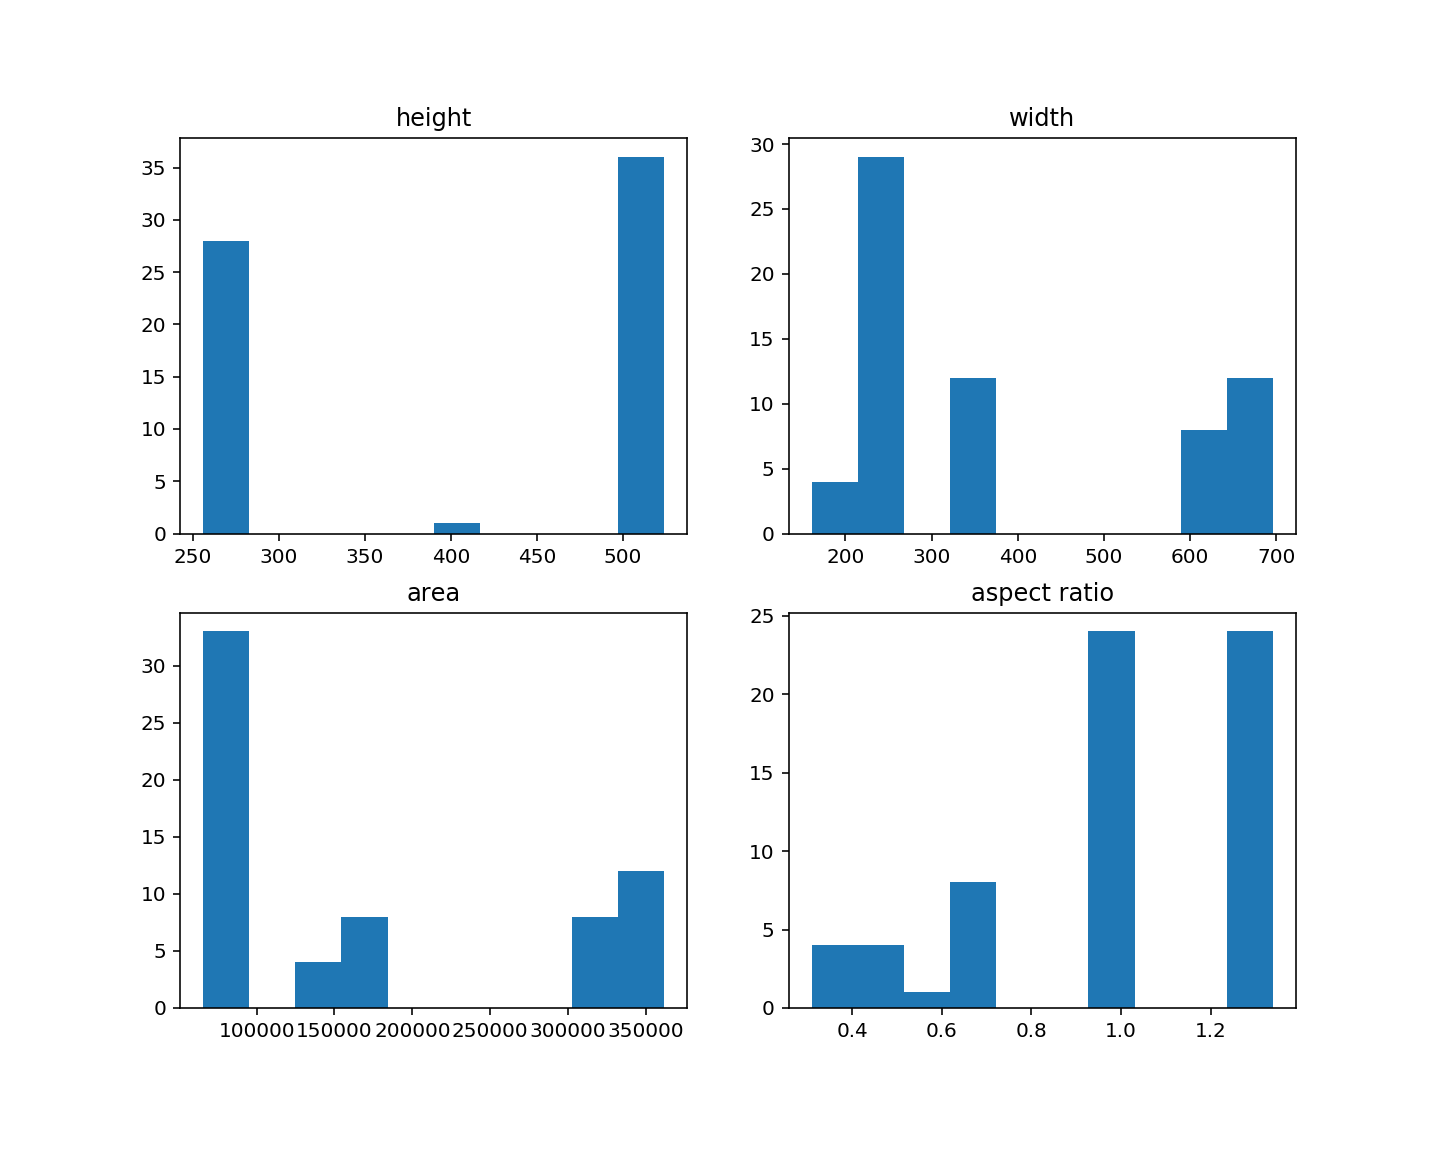

height val:  [256 260 390 512 519 520 524]
width val:  [161 162 239 253 256 347 348 640 680 696]
area val:  [ 65536  83559  84078  90220  93210 131307 180960 182352 327680 348160
 361920]
aspect_ratio val:  [ 0.31021195  0.31213873  0.48747592  0.61282051  0.66412214  0.66923077
  1.          1.25        1.328125    1.33461538  1.33846154]


In [138]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(height)
plt.title('height')
print('height val: ', np.unique(height))
plt.subplot(2, 2, 2)
plt.hist(width)
plt.title('width')
print('width val: ', np.unique(width))
plt.subplot(2, 2, 3)
plt.hist(area)
plt.title('area')
print('area val: ', np.unique(area))
plt.subplot(2, 2, 4)
plt.hist(aspect_ratio)
plt.title('aspect ratio')
print('aspect_ratio val: ', np.unique(aspect_ratio))

It seems that the testing images is of different size distribution than the training images.

### image and segmentation pixel intensities analysis

In [139]:
img_intensity_R = []
img_intensity_G = []
img_intensity_B = []
for key in testing_image_keys:
    testing_image_path = os.path.join('stage1_test', key, 'images', key + '.png')
    im = imageio.imread(testing_image_path)
    img_intensity_R.append(im[:, :, 0].mean())
    img_intensity_G.append(im[:, :, 1].mean())
    img_intensity_B.append(im[:, :, 2].mean())
    if im.shape[2] == 4:
        assert len(np.unique(im[:, :, 3])) == 1
        assert np.unique(im[:, :, 3])[0] == 255

<IPython.core.display.Javascript object>


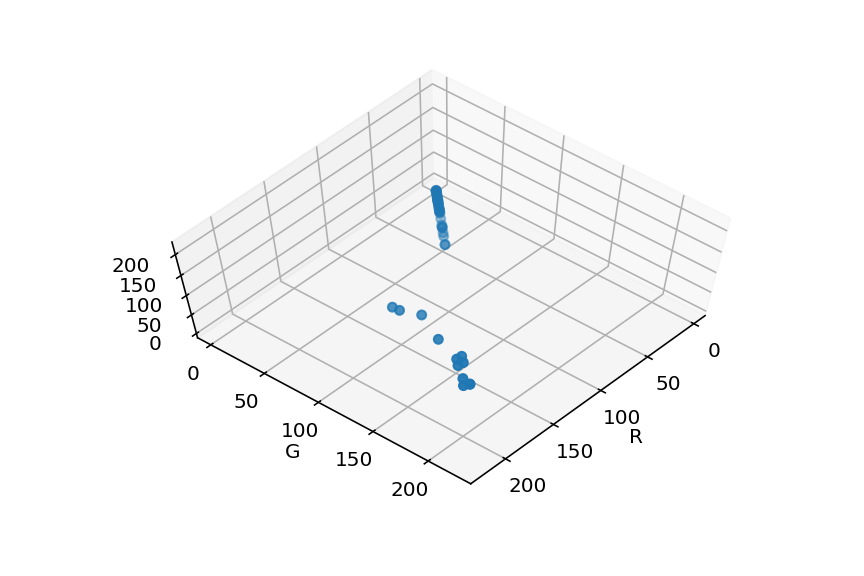

In [140]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(90, 0)
ax.scatter3D(img_intensity_R, img_intensity_G, img_intensity_B)
plt.xlabel('R')
plt.ylabel('G')

In [144]:
RGB_intensities = np.array([img_intensity_R, img_intensity_G, img_intensity_B]).T

<IPython.core.display.Javascript object>


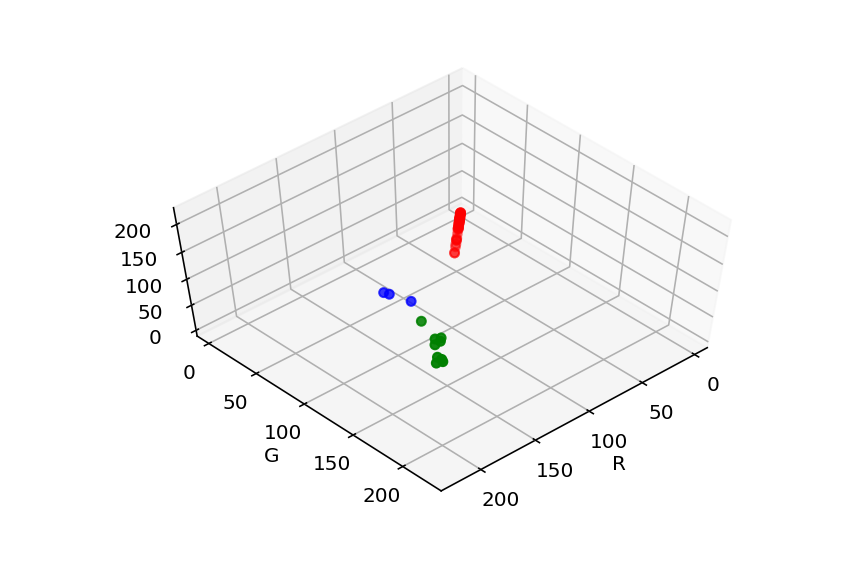

In [146]:
# here the model is DBSCAN trained in the training set.
model = DBSCAN(25)
prediction = model.fit_predict(RGB_intensities)
colors = [['r', 'g', 'b'][i] for i in prediction]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(90, 0)
ax.scatter3D(img_intensity_R, img_intensity_G, img_intensity_B, c=colors)
plt.xlabel('R')
plt.ylabel('G')

In [148]:
prediction = np.array(prediction)
prediction[prediction == -1] = 2
with open('test_condition1.txt', 'a') as f1, open('test_condition2.txt', 'a') as f2, open('test_condition3.txt', 'a') as f3:
    for i, cls in enumerate(prediction):
        if cls == 0:
            print(testing_image_keys[i], file=f1)
        elif cls == 1:
            print(testing_image_keys[i], file=f2)
        elif cls == 2:
            print(testing_image_keys[i], file=f3)
        else: 
            print('unclassified color intensity, cls=', cls)
            print(testing_image_keys[i])